Name: Rocio Hernandez

Labpartner(s): Edoardo

In [2]:
#import statements go here

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import matplotlib.animation as ani
from pylab import rcParams
import cartopy.crs as ccrs

# Class 11.2

#### Announcements

- Please message me and Victoria for coding help on slack, or your lab partners, or just post in the #coding_questions channel and we can all work together (#coding_questions is the best plan, you all often have the same/similar questions, and it makes folks feel good when they can help others). August needs a break and he is too nice to say no.

- Lots of cool animations on Monday! If you missed it, watch the recording. Lots of tips on how to make movies easier than I showed you.

- Today we are going to have a workday. For lecture I will talk about what makes a good scientific proposal, then you can use the lab period to work on your proposal or what you will. We are skipping the History of Hacking. You can do some research on your own.

- Reminder **all labs through Lab 9.2 need to have a satisfactory grade (no zeros) by end of the day Thursday 4/1 (tomorrow) to pass the class.** The last drop date is 4/6. The mastery of this beginning material is needed to complete this course. This includes the functions exercise and the expected grade assignment.


# Warmups 11.2

**W.1. (and finish for practice for this week)**
Get the movie dataset from lab 10.2 and load it into pandas. We want to finish what I started, answering the question if gross earnings is related to budget. Pull these two variables out and do a linear regression on them. You will probably have to clean them up by removing NaNs first using the methods you learned in datacamp.
Write a sentance or two describing the result of your regression analysis and what it means, that is discuss your results. How confident are you in your model, does budget predict earnings?

In [3]:
file = "movies.xls"
movies_sheet1 = pd.read_excel(file, sheet_name=0, index_col=0)
movies_sheet2 = pd.read_excel(file, sheet_name=1, index_col=0)
movies_sheet3 = pd.read_excel(file, sheet_name=2, index_col=0)
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])

In [4]:
movies

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,D.W. Griffith,...,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0
Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,Harry F. Millarde,...,2.0,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8
The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,King Vidor,...,81.0,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3
Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,Fritz Lang,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,Georg Wilhelm Pabst,...,426.0,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
War & Peace,NaN,Drama|History|Romance|War,English,UK,TV-14,NaN,16.00,NaN,NaN,NaN,...,1000.0,888.0,502.0,4528,11000,1.0,9277,44.0,10.0,8.2
Wings,NaN,Comedy|Drama,English,USA,NaN,30.0,1.33,NaN,NaN,NaN,...,685.0,511.0,424.0,1884,1000,5.0,7646,56.0,19.0,7.3
Wolf Creek,NaN,Drama|Horror|Thriller,English,Australia,NaN,NaN,2.00,NaN,NaN,NaN,...,511.0,457.0,206.0,1617,954,0.0,726,6.0,2.0,7.1


In [6]:
movies1= movies.dropna()


In [7]:
movies1

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,Fritz Lang,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
The Broadway Melody,1929.0,Musical|Romance,English,USA,Passed,100.0,1.37,379000.0,2808000.0,Harry Beaumont,...,77.0,28.0,4.0,109,167,8.0,4546,71.0,36.0,6.3
42nd Street,1933.0,Comedy|Musical|Romance,English,USA,Unrated,89.0,1.37,439000.0,2300000.0,Lloyd Bacon,...,610.0,105.0,45.0,995,439,2.0,7921,97.0,65.0,7.7
Top Hat,1935.0,Comedy|Musical|Romance,English,USA,Approved,81.0,1.37,609000.0,3000000.0,Mark Sandrich,...,610.0,172.0,23.0,824,1000,2.0,13269,98.0,66.0,7.8
Modern Times,1936.0,Comedy|Drama|Family,English,USA,G,87.0,1.37,1500000.0,163245.0,Charles Chaplin,...,309.0,8.0,8.0,352,0,1.0,143086,211.0,120.0,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Young Messiah,2016.0,Drama,English,USA,PG-13,111.0,2.35,18500000.0,6462576.0,Cyrus Nowrasteh,...,241.0,118.0,107.0,824,0,0.0,1449,30.0,24.0,5.4
Triple 9,2016.0,Action|Crime|Drama|Thriller,English,USA,R,115.0,2.35,20000000.0,12626905.0,John Hillcoat,...,14000.0,12000.0,968.0,27214,0,3.0,32567,106.0,214.0,6.3
Warcraft,2016.0,Action|Adventure|Fantasy,English,USA,PG-13,123.0,2.35,160000000.0,46978995.0,Duncan Jones,...,3000.0,716.0,648.0,5505,89000,0.0,111609,781.0,275.0,7.3


(0.0, 1000000000.0)

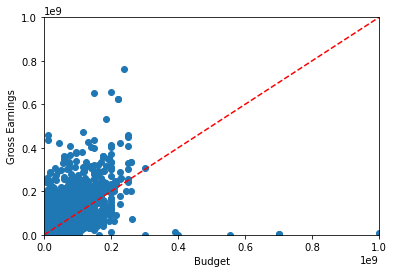

In [15]:
plt.scatter(movies1['Budget'], movies1['Gross Earnings'])
plt.plot([0,1E10],[0,1E10], 'k--', color='red',)
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.xlim([0,0.1E10])
plt.ylim([0,1E9])



In [ ]:
#In thought process, it sounds like having a larger budget can in turn create a 
#movie thats higher quality and in turn create a larger pool of earnings.
#However, the data seems to not be highly correlated because it's not as close to 1 as it can be.  



# Lecture 11.2

### Agenda:
- What makes a good scientific research proposal?
    - Dataset or way to generate data to analyze (e.g. a model)
    - Well defined research question(s) that can be adressed with the above dataset/methods
    - Clear explaination of what you are going to do to answer these research questions (not too technical/jargony, but some details)
    - Convince the reader/reviewer you have the expertise and the resources to do the work (don't promise more than you can do)
    - Realistic timelines and adequate personell 
    
#### On Monday you will give a 5 min talk on your proposed research 
Just a couple of slides and some discussion

- What makes a good talk?

In [ ]:
#Having a clear dataset and data vizualization plan to build your proposal around. 
#Sticking to a dataset/world that you understand 
#Clear, concise and paced talk. 
#Having those handy dandy notes around for you to reference back to. 


# Lab 11.2

Today is a workday. Catch up and work on your research proposal. I am here to assist you.

**E.1** Complete your research proposal (see assignment and checklist in folder in github)

# Completed!!

**E.2** On Monday we will workshop research proposal plans together. This should be fun, helpful, and not too formal/serious. Prepare a few slides (2-3) on your proposed research to share with the class. Talk about your research question(s) and your proposed methods and we will ask you questions and give you feedback.

Please note both of these exercises are manditory to pass the class and must be completed on time (no late work will be accepted)

In [ ]:
#Completed! 